# Introduction
The first half runs TensorFlow's Example. In the latter half, we will write the code for Keras.

# Problem 1
Sharing and executing the official tutorial model

### NOTE
- Since it's computationally expensive, i've moved it to another notebook named problem1.ipynb in the same folder
- Relative Link: [./problem2.ipynb](./problem1.ipynb)
- Github: [Link]()

# Problem 2
(Advance assignment) Execute various methods

### NOTE
- Since it's computationally expensive, i've moved it to another notebook named problem2.ipynb in the same folder
- Relative Link: [./problem2.ipynb](./problem2.ipynb)
- Github: [Link]()

# Problem 3
Learning Iris (binary classification) with Keras

## Prep

In [217]:
# load data
from sklearn.datasets import load_iris

iris_bunch = load_iris(as_frame = True)
print('features', iris_bunch.feature_names)
print('targets', iris_bunch.target_names)

features ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets ['setosa' 'versicolor' 'virginica']


In [218]:
# check features
features_data = iris_bunch.data
print(features_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [219]:
# check target
target_data = iris_bunch.target
print('labels: ', target_data.unique())
print(target_data.head())

labels:  [0 1 2]
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [220]:
# binary classification filter
first_two_laybel_indexes =  target_data.lt(2)
binary_x = features_data[first_two_laybel_indexes]
binary_y = target_data[first_two_laybel_indexes]

print('Before shape: ', features_data.shape, target_data.shape)
print('After shape: ', binary_x.shape, binary_y.shape)

Before shape:  (150, 4) (150,)
After shape:  (100, 4) (100,)


In [221]:
# standardization
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
processed_bin_x = scaler.fit_transform(binary_x.to_numpy())
# print('before trans')
# print(binary_x.describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_x).describe())

# onehot encode
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
binary_y = binary_y.to_numpy().reshape(-1,1)
processed_bin_y = enc.fit_transform(binary_y).toarray()
# print('before trans')
# print(pd.DataFrame(binary_y).describe())
# print('after scale')
# print(pd.DataFrame(processed_bin_y).describe())

In [222]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(processed_bin_x, processed_bin_y)
print([x.shape for x in [x_train, x_test, y_train,y_test]])

[(75, 4), (25, 4), (75, 2), (25, 2)]


## Model

In [223]:
import tensorflow as tf
import tensorflow.keras as keras

In [224]:
# model
model = keras.Sequential()

# layers
from tensorflow.keras import layers

model.add(layers.Dense(20, activation="relu", name="layer1"))
model.add(layers.Dense(10, activation="relu", name="layer2"))
model.add(layers.Dense(2, name="layer3"))


model.layers

In [225]:
model.build(x_train.shape)
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (75, 20)                  100       
_________________________________________________________________
layer2 (Dense)               (75, 10)                  210       
_________________________________________________________________
layer3 (Dense)               (75, 2)                   22        
Total params: 332
Trainable params: 332
Non-trainable params: 0
_________________________________________________________________


In [226]:
# loss
loss = 'binary_crossentropy'
# optimizer
optimizer = 'adam'
#metrics
metrics = ['accuracy']

In [227]:
model.compile(optimizer, loss, metrics = metrics)

In [215]:
history = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_data= (x_test, y_test))


Epoch 1/100
8/8 [==============================] - 1s 42ms/step - loss: 4.6092 - accuracy: 0.4800 - val_loss: 3.9028 - val_accuracy: 0.5600
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 4.4918 - accuracy: 0.4800 - val_loss: 3.7989 - val_accuracy: 0.5600
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 4.4194 - accuracy: 0.4800 - val_loss: 3.7280 - val_accuracy: 0.5600
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 4.3642 - accuracy: 0.4800 - val_loss: 3.6734 - val_accuracy: 0.5600
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 4.3180 - accuracy: 0.4800 - val_loss: 3.6284 - val_accuracy: 0.5600
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 4.2825 - accuracy: 0.4800 - val_loss: 3.5893 - val_accuracy: 0.5600
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 4.2508 - accuracy: 0.4800 - val_loss: 3.5567 - val_accuracy: 0.5600
Epoch 8/100
8/8 [=========

train loss


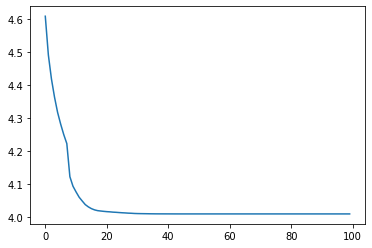

val loss


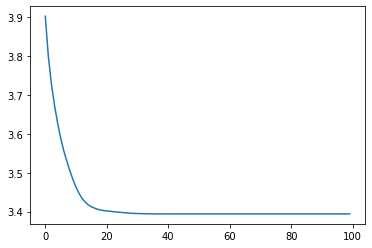

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt
# loss
print('train loss')
sns.lineplot(data = history.history['loss'])
plt.show()
print('val loss')
sns.lineplot(data = history.history['val_loss'])
plt.show()

# Problem 2
Learn Iris (multi-level classification) with Keras